In [34]:
import numpy as np
import os


os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [35]:
import json


version = '1.0.0'
check_data_version = '1.1.4'


with open(f'../create_dataset/v{check_data_version}/label.json', 'r', encoding='utf-8') as file:
    label = json.load(file)
    
word_count = label['label_count'] * 2 - 1

In [36]:
data_dir = f'../create_dataset/v{check_data_version}/data'
data_files_list = os.listdir(data_dir)


data_files_list.sort()


data = np.concatenate([
    np.load(f'{data_dir}/{file}') for file in data_files_list
], axis=0)
np.shape(data)

(16263, 10, 83)

In [37]:
x_data = data[:, :, :-1]
labels = data[:, 0, -1]

print(x_data.shape)
print(labels.shape)
print(*labels)

(16263, 10, 82)
(16263,)
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0

In [38]:
from tensorflow.keras.utils import to_categorical
from keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=word_count)
y_data.shape

(16263, 29)

In [39]:
from sklearn.model_selection import train_test_split

time_stamp = 1
x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1, random_state=2021)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(14636, 10, 82) (14636, 29)
(1627, 10, 82) (1627, 29)


In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(64, activation='relu', input_shape=x_train.shape[1:3], return_sequences=False),
    Dense(32, activation='relu'),
    Dense(word_count, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 64)                37632     
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 29)                957       
                                                                 
Total params: 40669 (158.86 KB)
Trainable params: 40669 (158.86 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
check_data_version = check_data_version.replace('.', '')
version = version.replace('.', '')

In [42]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau



history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=200,
    callbacks=[
        ModelCheckpoint(f'../models/data_{check_data_version}_train_{version}_model.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    ]
)

Epoch 1/200
449/458 [============================>.] - ETA: 0s - loss: 7.4249 - acc: 0.5889
Epoch 1: val_acc improved from -inf to 0.88076, saving model to ../models\data_114_train_100_model.h5
458/458 [==============================] - 3s 3ms/step - loss: 7.2975 - acc: 0.5944 - val_loss: 0.4542 - val_acc: 0.8808 - lr: 0.0010
Epoch 2/200
 56/458 [==>...........................] - ETA: 1s - loss: 0.4371 - acc: 0.8817

c:\PYTHON\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


458/458 [==============================] - ETA: 0s - loss: 0.3000 - acc: 0.9132
Epoch 2: val_acc improved from 0.88076 to 0.92747, saving model to ../models\data_114_train_100_model.h5
458/458 [==============================] - 1s 3ms/step - loss: 0.3000 - acc: 0.9132 - val_loss: 0.2034 - val_acc: 0.9275 - lr: 0.0010
Epoch 3/200
441/458 [===========================>..] - ETA: 0s - loss: 0.1574 - acc: 0.9466
Epoch 3: val_acc improved from 0.92747 to 0.96251, saving model to ../models\data_114_train_100_model.h5
458/458 [==============================] - 1s 3ms/step - loss: 0.1586 - acc: 0.9467 - val_loss: 0.2171 - val_acc: 0.9625 - lr: 0.0010
Epoch 4/200
454/458 [============================>.] - ETA: 0s - loss: 0.3489 - acc: 0.9064
Epoch 4: val_acc did not improve from 0.96251
458/458 [==============================] - 1s 3ms/step - loss: 0.3473 - acc: 0.9067 - val_loss: 0.1450 - val_acc: 0.9312 - lr: 0.0010
Epoch 5/200
454/458 [============================>.] - ETA: 0s - loss: 0.1131 

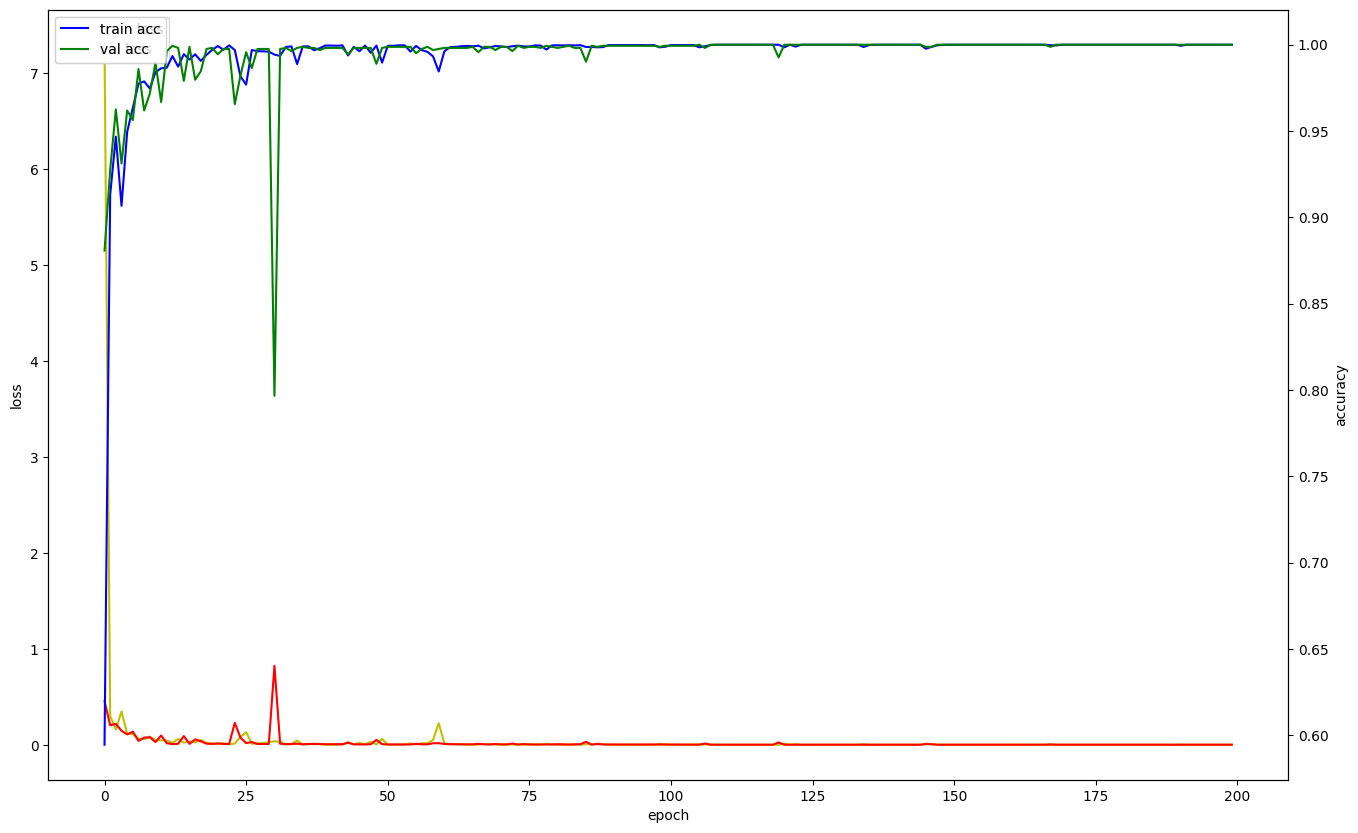

In [43]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.savefig(f'../readme_img/data_{check_data_version}_train_{version}.png')
plt.show()

In [44]:

from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model


model = load_model(f'../models/data_{check_data_version}_train_{version}_model.h5')

y_pred = model.predict(x_val)

multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

51/51 [==============================] - 0s 2ms/step


array([[[1580,    0],
        [   0,   47]],

       [[1567,    0],
        [   0,   60]],

       [[1563,    0],
        [   0,   64]],

       [[1564,    0],
        [   0,   63]],

       [[1566,    0],
        [   0,   61]],

       [[1565,    0],
        [   0,   62]],

       [[1582,    0],
        [   0,   45]],

       [[1583,    0],
        [   0,   44]],

       [[1568,    0],
        [   0,   59]],

       [[1567,    0],
        [   0,   60]],

       [[1589,    0],
        [   0,   38]],

       [[1563,    0],
        [   0,   64]],

       [[1572,    0],
        [   0,   55]],

       [[1567,    0],
        [   0,   60]],

       [[1576,    0],
        [   0,   51]],

       [[1581,    0],
        [   0,   46]],

       [[1568,    0],
        [   0,   59]],

       [[1576,    0],
        [   0,   51]],

       [[1571,    0],
        [   0,   56]],

       [[1550,    0],
        [   0,   77]],

       [[1570,    0],
        [   0,   57]],

       [[1566,    0],
        [   